In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

plt.rcParams["figure.figsize"] = (15,6)

def plt_rgb(_img, convert=True):
    if convert:
        _img = cv2.cvtColor(_img, cv2.COLOR_BGR2RGB)
    else:
        _img = cv2.cvtColor(_img, cv2.COLOR_GRAY2RGB)
    plt.imshow(_img)
    plt.show()

# Exercises

# 4. Image enhancement – filtering

Take a noisy image (see problem 2.d) and filter it (try different filter sizes), using:
(for a-d see https://docs.opencv.org/4.x/dc/dd3/tutorial_gausian_median_blur_bilateral_filter.html)

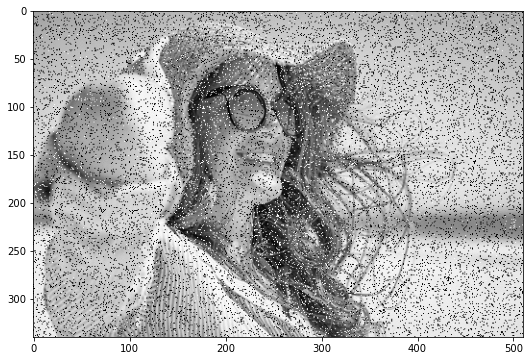

In [2]:
img = cv2.imread('noisy.jpg')
plt_rgb(img)

## a) a mean filter;

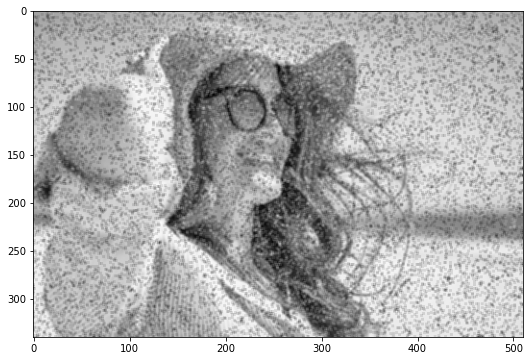

In [3]:
blur = cv2.blur(img, (3,3))
plt_rgb(blur)

## b) a Gaussian filter

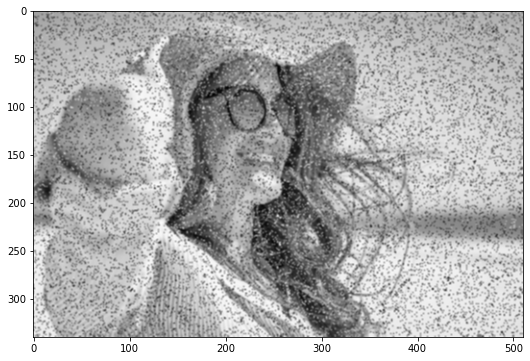

In [4]:
gaussian = cv2.GaussianBlur(img, (3,3), 0)
plt_rgb(gaussian)

## c) a median filter

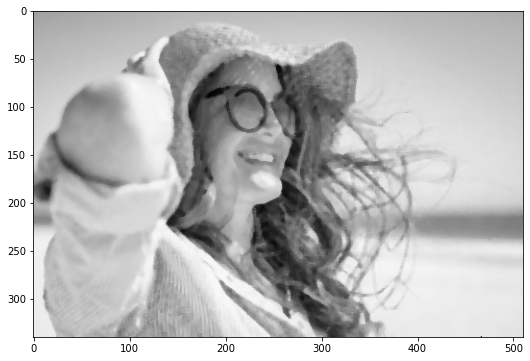

In [5]:
median = cv2.medianBlur(img, 5)
plt_rgb(median)

## d) a Bilateral filter

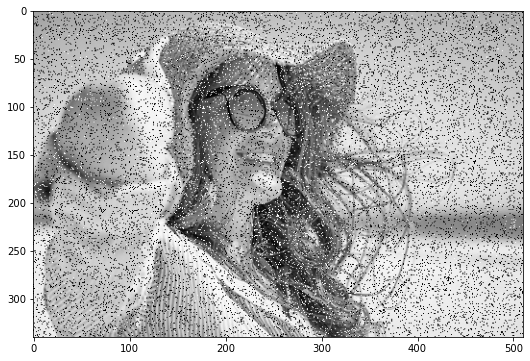

In [6]:
bilateral = cv2.bilateralFilter(img, 3, 10, 10)
plt_rgb(bilateral)

## e) a filter defined by you, adapting the following code (note: remove the (1/14) factor in the assignment of kernel_3x3 and explain what happens)

In [7]:
# Smooth using OpenCV GaussianBlur()
gaussianBlurred = cv2.GaussianBlur(img, (3,3), 0)

# Smooth using convolution operation coded below
# we need to normalize the matrix so the pixels are not distorted
kernel_3x3 = (1/20)*np.array([[1, 4, 1],[1, 6, 1],[1, 4, 1]]) 
print(kernel_3x3)
# myConvolutionResult = ndimage.convolve(img, kernel_3x3)

# Show results
# ...

[[0.05 0.2  0.05]
 [0.05 0.3  0.05]
 [0.05 0.2  0.05]]


# 5. Image enhancement – histogram equalization

(see: https://docs.opencv.org/4.x/d8/dbc/tutorial_histogram_calculation.html  
https://docs.opencv.org/4.x/d1/db7/tutorial_py_histogram_begins.html  
https://docs.opencv.org/master/d5/daf/tutorial_py_histogram_equalization.html  
https://www.cambridgeincolour.com/tutorials/histograms1.htm )

## a) Take a low contrast grayscale image and plot its histogram.

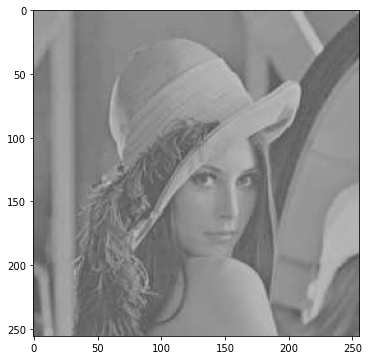

In [8]:
img = cv2.imread('low_contrast.png', 0)
    
plt_rgb(img, False)

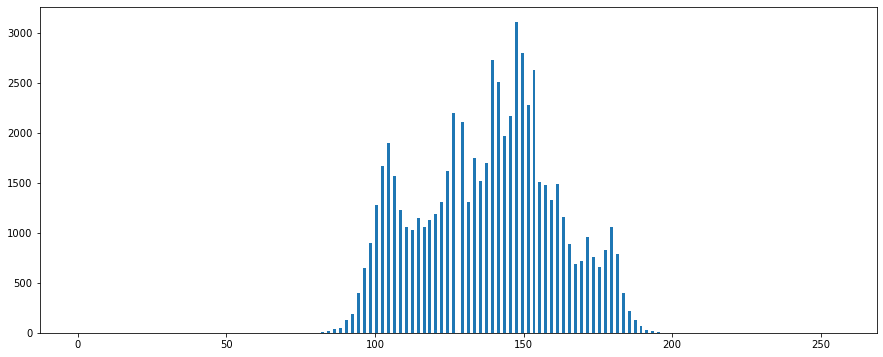

In [9]:
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

## b) Enhance the image constrast using: 
### b1) simple histogram equalization

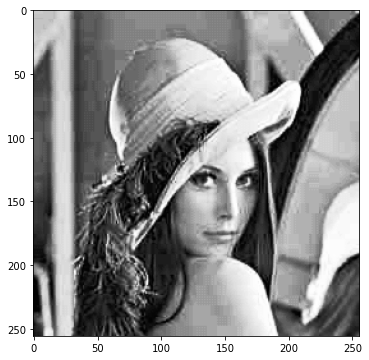

In [10]:
equalized = cv2.equalizeHist(img)
plt_rgb(equalized, False)

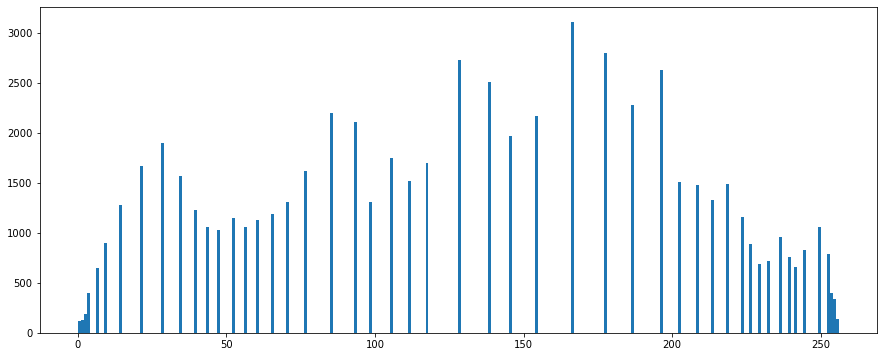

In [11]:
plt.hist(equalized.ravel(), 256, [0, 256])
plt.show()

### b2) CLAHE

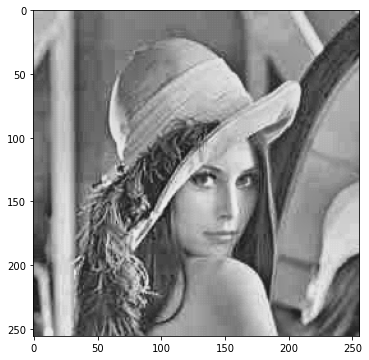

In [12]:
clahe = cv2.createCLAHE(clipLimit=6.0, tileGridSize=(4,4))
cl1 = clahe.apply(img)

plt_rgb(cl1, False)

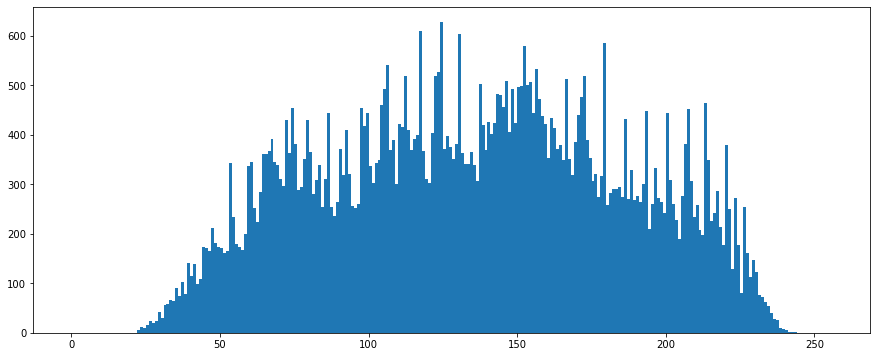

In [13]:
plt.hist(cl1.ravel(), 256, [0, 256])
plt.show()

## Repeat the previous operations on a color image.

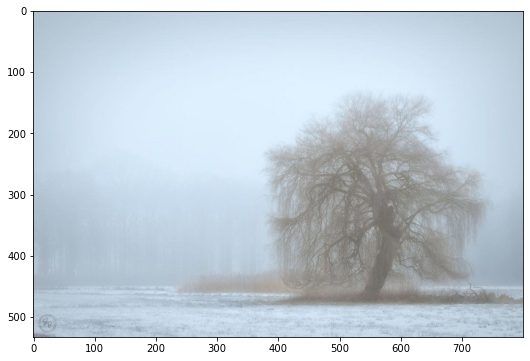

In [14]:
img = cv2.imread('low_contrast_color.jpg')

plt_rgb(img)

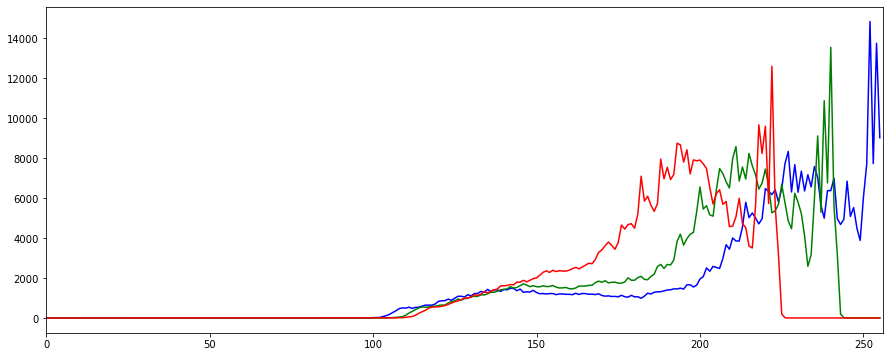

In [15]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

### Simple Histogram Equalization

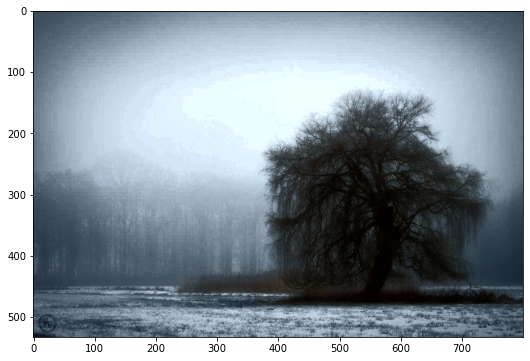

In [16]:
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

plt_rgb(img_output)

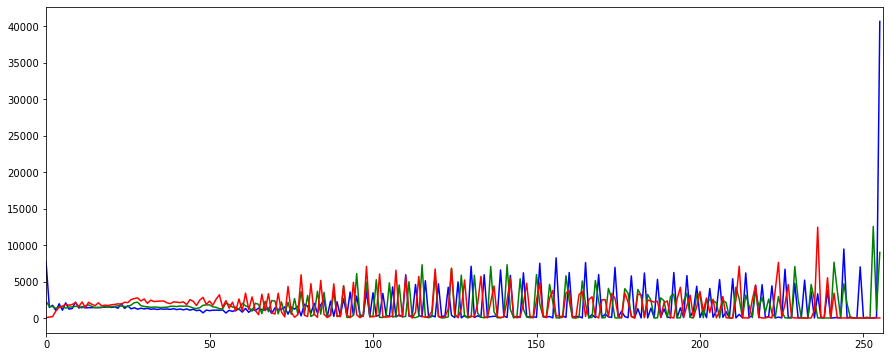

In [17]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_output],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

### CLAHE

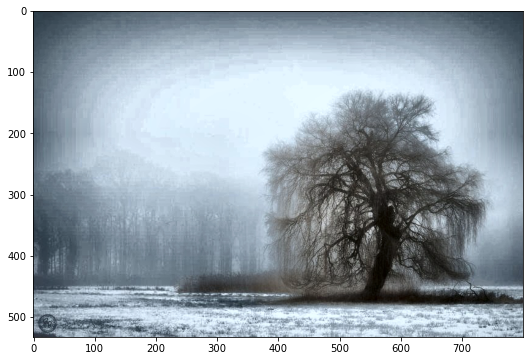

In [18]:
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

clahe = cv2.createCLAHE(clipLimit=5.0,tileGridSize=(4,4))

lab[...,0] = clahe.apply(lab[...,0])

bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

plt_rgb(bgr)

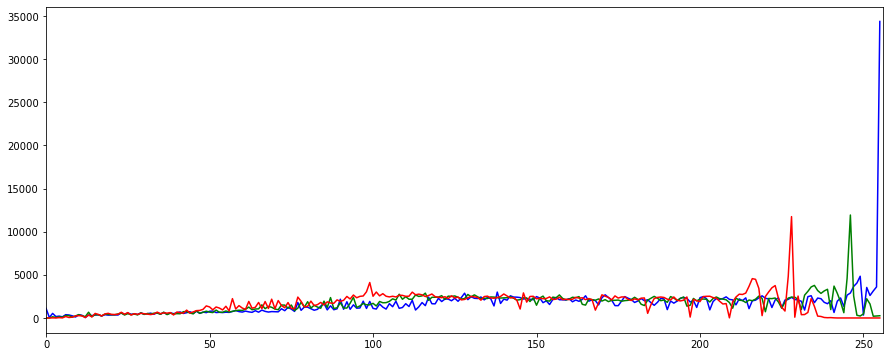

In [19]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([bgr],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

# 6. Edge detection – Sobel filter

(see: https://docs.opencv.org/4.x/d2/d2c/tutorial_sobel_derivatives.html  
https://docs.opencv.org/4.x/da/d6a/tutorial_trackbar.html  
https://docs.opencv.org/4.x/db/d8e/tutorial_threshold.html)

Detect the edges of an image using the Sobel filter, by implementing the following steps:

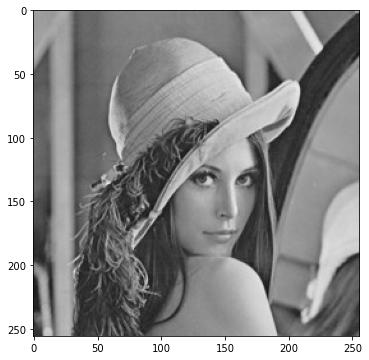

In [20]:
img = cv2.imread('test.jpeg', 0)

plt_rgb(img, False)

## a) calculate the first derivatives of the image in x and y directions, using the Sobel() function;

In [21]:
gX = cv2.Sobel(img, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
gY = cv2.Sobel(img, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=-1)
# the gradient magnitude images are now of the floating point data
# type, so we need to take care to convert them back a to unsigned
# 8-bit integer representation so other OpenCV functions can operate
# on them and visualize them
gX = cv2.convertScaleAbs(gX)
gY = cv2.convertScaleAbs(gY)

## b) calculate the approximate value of the gradient by combining the directional derivatives;

In [22]:
combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)

## c) show the "gradient image"

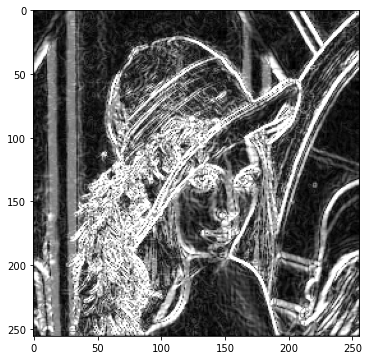

In [23]:
plt_rgb(combined, False)

## d) show the result of thresholding the "gradient image"; use a trackbar to select the threshold value

In [24]:
thresholdValue = 150
maxValue = 255

#callback method for trackbar value change
def onTrackbarValueChange(*args):
    global thresholdValue
    thresholdValue = args[0]
    th, result = cv2.threshold(combined, thresholdValue, maxValue, cv2.THRESH_BINARY)
    cv2.imshow("image", result)

#create window
cv2.namedWindow("image", cv2.WINDOW_NORMAL)

#create trackbar
cv2.createTrackbar("Value", "image", thresholdValue, maxValue, onTrackbarValueChange)

#call method to initialize first time
onTrackbarValueChange(thresholdValue)

while True:
    k = cv2.waitKey(10)
    
    #press esc on keyboard to exit
    if k == 27:
        break

#close all the opened windows
cv2.destroyAllWindows()

## Exercise 6 - wrap up program

```python
import argparse
import cv2

ap = argparse.ArgumentParser()

ap.add_argument("-i", "--image", type=str, required=True, help="Image path")
ap.add_argument("-k", "--kernel", type=int, default=-1, help="Kernel Size for Sobel (1,3,5,7)")
ap.add_argument("-g", "--gaussian", action="store_true", help="Apply Gaussian Filter")
ap.add_argument("-gs", "--gaussiansize", type=int, default=3, help="Box Size for Gaussian Filter")

args = vars(ap.parse_args())

img = cv2.imread(args["image"], 0)

if args["gaussian"]:
    img = cv2.GaussianBlur(img, (args["gaussiansize"], args["gaussiansize"]), 0)


gX = cv2.Sobel(img, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=args["kernel"])
gY = cv2.Sobel(img, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=args["kernel"])
# the gradient magnitude images are now of the floating point data
# type, so we need to take care to convert them back a to unsigned
# 8-bit integer representation so other OpenCV functions can operate
# on them and visualize them
gX = cv2.convertScaleAbs(gX)
gY = cv2.convertScaleAbs(gY)

combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)

thresholdValue = 128
maxValue = 255


# callback method for trackbar value change
def onTrackbarValueChange(*args):
    global thresholdValue
    thresholdValue = args[0]
    th, result = cv2.threshold(combined, thresholdValue, maxValue, cv2.THRESH_BINARY)
    cv2.imshow("image", result)


# create window
cv2.namedWindow("image", cv2.WINDOW_NORMAL)

# create trackbar
cv2.createTrackbar("Value", "image", thresholdValue, maxValue, onTrackbarValueChange)

# call method to initialize first time
onTrackbarValueChange(thresholdValue)

while True:
    k = cv2.waitKey(10)

    # press esc on keyboard to exit
    if k == 27:
        break

# close all the opened windows
cv2.destroyAllWindows()
```

## 7. Edge detection – Canny filter

(see: https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html  
https://learnopencv.com/mouse-and-trackbar-in-opencv-gui/#mouse-annotation )

### a) Detect the edges of an image using the Canny() OpenCV function. Suggestion: use trackbars to select different low and high threshold for the hysteresis procedure and different aperture size for the Sobel() function.


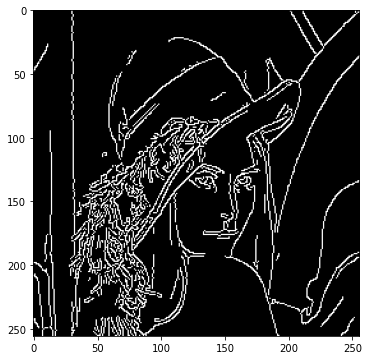

In [4]:
img = cv2.imread('test.jpg', 0)

edges = cv2.Canny(img, 100, 200)

plt_rgb(edges, False)